## 전주시 신규 문화관광지역 활성화  + 낙후지역

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font',family = 'Malgun Gothic')
plt.rc('axes',unicode_minus = False)

import requests
from bs4 import BeautifulSoup
import time
import urllib.request 
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,ElementClickInterceptedException 
import datetime as dt
from urllib.request import urlopen

In [2]:
tour = pd.read_csv('관광지.csv')
culture = pd.read_csv('문화시설.csv')
many = pd.read_csv('여러개.csv')
etc = pd.read_csv('기타.csv')
food = pd.read_csv('음식.csv')
experience = pd.read_csv('체험.csv')

In [3]:
col_list = [tour, culture, many]

for a in col_list :
    a.rename(columns = {a.columns[0] : "이름"},inplace = True)

In [4]:
total = pd.concat([pd.concat([tour,culture]),many])

total2 = pd.concat([pd.concat([etc,food]),experience])

In [5]:
total = pd.concat([total,total2]).reset_index(drop = True)

In [6]:
total = total.drop_duplicates('이름').reset_index(drop = True)

In [7]:
total.to_csv("total.csv",index = False)

In [8]:
for i in range(len(total)):
    if '주소' not in total['정보'][i] :
        print(i)

83


In [9]:
total['정보'][83] = '문의 및 안내 063-239-2546\n홈페이지\n관람석 장애인 전용 관람석 있음\n엘리베이터 엘리베이터 있음\n출입통로 주출입구는 단차가 없어 휠체어 접근 가능함\n수유실 수유실 있음\n주차 장애인 전용 주차구역 있음_무장애 편의시설\n접근로 출입구까지 경사로가 설치되어 있음\n화장실 장애인 전용 화장실 있음\n주소 전라북도 전주시 덕진구 기린대로 1055'

In [10]:
address = []
for i in range(len(total)):
    for info  in total['정보'][i].split('\n') :
        if '주소' in info :
            address.append(info[3:])

In [11]:
total['주소'] = address

In [12]:
total['구'] = [ad.split(' ')[2] for ad in total['주소']]

<AxesSubplot:>

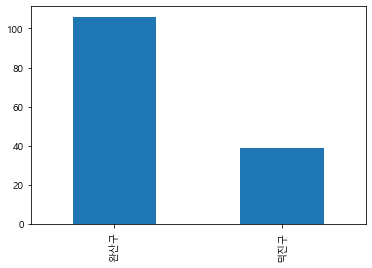

In [102]:
total['구'].value_counts().plot.bar()

In [13]:
cafe = pd.read_csv('전주시카페.csv')

In [14]:
dong_list = [cafe['지번주소'][i].split(' ')[1] for i in range(len(cafe))]

In [15]:
revise_list = []
for dong in dong_list :
    if dong.endswith('가') :
        for i,a in enumerate(dong) :
            if a== '동' :
                revise_list.append(dong[:i+1])
    else :
        revise_list.append(dong)

In [16]:
cafe['동'] = revise_list

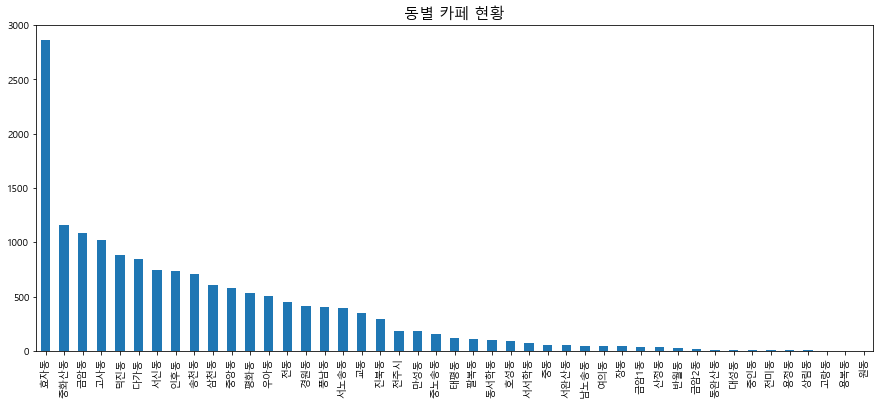

In [153]:
plt.figure(figsize = (15,6))
cafe['동'].value_counts().plot.bar()
plt.title("동별 카페 현황",fontsize = 15)
plt.show()

In [2]:
population = pd.read_excel('전주시_구·동별_연령_각세_별_한국인_현황_20210410105345.xlsx')

In [3]:
columns = []
for i in range(population.shape[1]) :
    if i == 0 :
        columns.append('연령별')
    else :
        columns.append(population.columns[i].split('.')[0] + '년_' + population.iloc[0,i] + '_' + population.iloc[1,i])

In [4]:
population.columns = columns

In [5]:
population = population.iloc[2:,:]

In [6]:
population.set_index('연령별',inplace = True)

In [7]:
population = population.replace('-',0)

In [8]:
total_list = []
man_list = []
woman_list = []
for col in population.columns :
    if '계' in col :
        total_list.append(col)
    elif '남' in col :
        man_list.append(col) 
    else :
        woman_list.append(col)

In [9]:
woman = pd.DataFrame(population[woman_list].iloc[4:8,:].sum(axis = 0))

In [10]:
womand_list = []
for index in woman.index :
    womand_list.append(index[:-2])

In [11]:
woman['동'] = womand_list

In [12]:
woman.set_index('동',inplace =  True)

In [13]:
woman.rename(columns = {0 : '20∼39세 여성 인구'},inplace = True)

In [14]:
total = pd.DataFrame(population[total_list].iloc[13:,:].sum(axis = 0))

In [15]:
totald_list = []
for index in total.index :
    totald_list.append(index[:-2])

In [16]:
total['동'] = totald_list
total.set_index("동",inplace = True)
total.rename(columns = {0 : "65세이상 인구"},inplace = True)

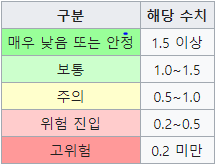

In [17]:
list_2017,list_2018,list_2019 = [],[],[]
for index in woman.index :
    if '2017' in index : 
        list_2017.append(index)
    elif '2018' in index :
        list_2018.append(index)
    else :
        list_2019.append(index)

In [18]:
lists_2017,lists_2018,lists_2019 = [],[],[]

for index in total.index :
    if '2017' in index and '풍남동' not in index: 
        lists_2017.append(index)
    elif '2018' in index and '풍남동' not in index:
        lists_2018.append(index)
    elif '2019' in index and '풍남동' not in index:
        lists_2019.append(index)

In [19]:
dong_2017 = pd.concat([woman.loc[list_2017],total.loc[lists_2017]],axis = 1)
dong_2017['소멸위험지수'] = dong_2017['20∼39세 여성 인구'] / dong_2017['65세이상 인구']

지수가 0.5 미만이면 인구소멸 위험 지역, 0.2 미만이면 인구소멸 고위험 지역으로 간주한다.

In [20]:
danger_2017 = dong_2017.sort_values(by='소멸위험지수')[:6].reset_index()[['동','소멸위험지수']]

In [21]:
dong_2018 = pd.concat([woman.loc[list_2018],total.loc[lists_2018]],axis = 1)
dong_2018['소멸위험지수'] = dong_2018['20∼39세 여성 인구'] / dong_2018['65세이상 인구']
dong_2018.sort_values(by='소멸위험지수',ascending = False)

,20∼39세 여성 인구,65세이상 인구,소멸위험지수
동,,,
2018년_효자5동,6596,2007,3.286497
2018년_혁신동,2296,808,2.841584
2018년_송천1동,7128,3469,2.054771
2018년_효자4동,4128,2473,1.669228
2018년_중화산2동,2836,1869,1.517389
2018년_인후3동,4610,3420,1.347953
2018년_서신동,5712,4316,1.323448
2018년_동산동,3447,2764,1.247106
2018년_덕진동,3379,2776,1.217219


In [22]:
danger_2018 = dong_2018.sort_values(by='소멸위험지수')[:8].reset_index()[['동','소멸위험지수']]

In [23]:
dong_2019 = pd.concat([woman.loc[list_2019],total.loc[lists_2019]],axis = 1)
dong_2019['소멸위험지수'] = dong_2019['20∼39세 여성 인구'] / dong_2019['65세이상 인구']
dong_2019.sort_values(by='소멸위험지수',ascending = False)

,20∼39세 여성 인구,65세이상 인구,소멸위험지수
동,,,
2019년_효자5동,6494,2090,3.107177
2019년_혁신동,2220,838,2.649165
2019년_송천1동,8507,3979,2.137974
2019년_효자4동,4665,2885,1.616984
2019년_동산동,4385,3084,1.421855
2019년_중화산2동,2746,1940,1.415464
2019년_인후3동,4293,3545,1.211001
2019년_서신동,5413,4485,1.206912
2019년_덕진동,3150,2810,1.120996


In [24]:
danger_2019 = dong_2019.sort_values(by='소멸위험지수')[:9].reset_index()[['동','소멸위험지수']]

In [25]:
danger_2017.rename(columns={"소멸위험지수" : "2017년_소멸위험지수"},inplace = True)
danger_2018.rename(columns={"소멸위험지수" : "2018년_소멸위험지수"},inplace = True)
danger_2019.rename(columns={"소멸위험지수" : "2019년_소멸위험지수"},inplace = True)

In [26]:
danger_2017['동'] = [danger_2017['동'][i].split('_')[1] for i in range(len(danger_2017))]
danger_2018['동'] = [danger_2018['동'][i].split('_')[1] for i in range(len(danger_2018))]
danger_2019['동'] = [danger_2019['동'][i].split('_')[1] for i in range(len(danger_2019))]

In [27]:
danger = pd.merge(danger_2017,danger_2018,how='right').fillna(0)
danger = pd.merge(danger,danger_2019,how = 'right').fillna(0)

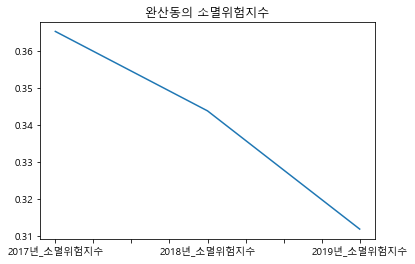

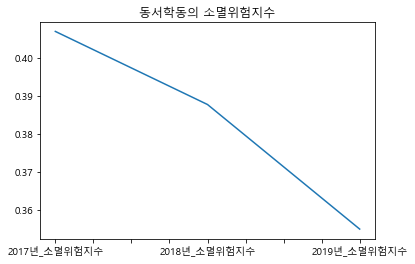

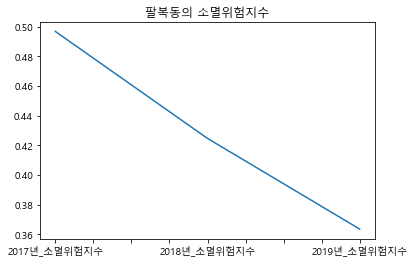

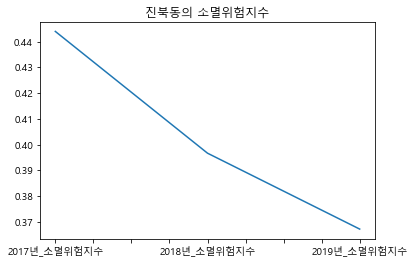

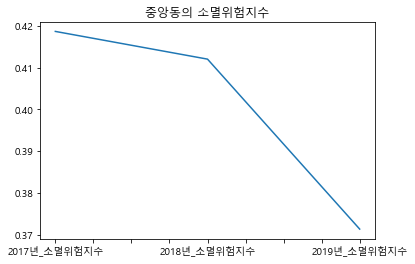

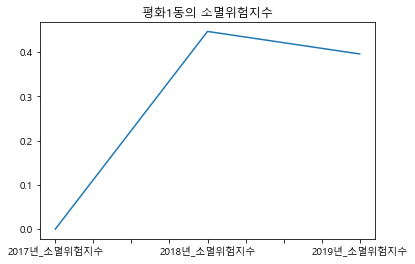

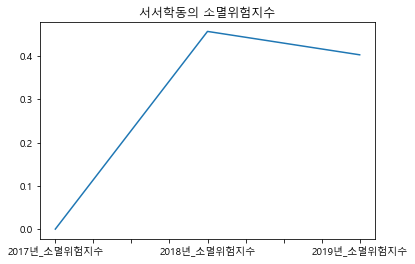

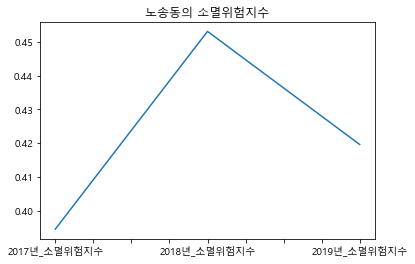

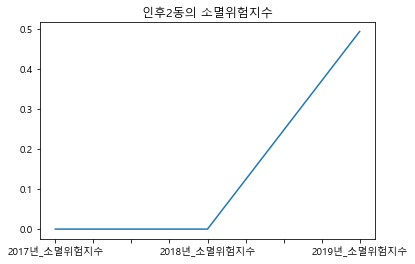

In [28]:
for i in range(len(danger)) :
    danger.set_index('동').iloc[i,:].plot()
    plt.title("{}의 소멸위험지수".format(danger.iloc[i,:]['동']))
    plt.show()

행정동 35개, 법정동 83개

In [29]:
concert = pd.read_csv('전라북도 전주시_공연장 현황_20210215.csv',encoding = 'cp949')

In [30]:
dong_list= [ ]
for dong in concert['공연장소재지(지번)'] :
    for d in dong.split(' ') :
        if d.endswith('가') and len(d) > 2 :
            dong_list.append(d)
        elif d.endswith('동') and len(d) >= 2 :
            dong_list.append(d)

In [31]:
del dong_list[18]

In [32]:
revise_list = []
for dong in dong_list :
    if dong.endswith('가') :
        for i,a in enumerate(dong) :
            if a=='동' :
                revise_list.append(dong[:i+1])
    else :
        revise_list.append(dong)

In [40]:
concert['동'] = revise_list

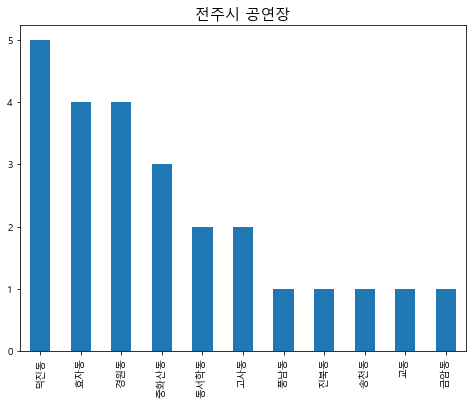

In [151]:
plt.figure(figsize = (8,6))
concert['동'].value_counts().plot.bar()
plt.title("전주시 공연장",fontsize = 15)
plt.show()

### 음식점

In [41]:
food = pd.read_csv('전라북도 전주시_음식점 정보_20201229.csv')

In [42]:
food = food.iloc[:,:20]

In [43]:
food['행정동'] = [dong.split(' ')[3] for dong in food['지번주소'] ]

In [44]:
food['행정동'].nunique()

53

인프라 변수 : 카페 / 편의점 / 버스정류장 / 문화시설 / 공원 등

지리적 변수 : 중심지와의 거리(전주역 혹은 한옥마을) / tmap 기준 문화관광 카테고리 한정 목적지 수

인구통계학적 변수 : 연령대별 인구수(청소년 , 청년층 등)

In [2]:
pop = pd.read_csv('202012_202012_주민등록인구및세대현황_연간.csv',encoding = 'cp949')

In [3]:
index_list = []
for i in range(len(pop)) :
    if pop['행정구역'][i].split('(')[0].endswith('동') :
        index_list.append(i)
pop_dong = pop.iloc[index_list,:].reset_index(drop = True)

In [4]:
pop_dong.insert(1,'행정동',[pop_dong['행정구역'][i].split('(')[0].split(' ')[3] for i in range(len(pop_dong))])

In [5]:
pop_dong = pop_dong.iloc[:,1:]

In [6]:
pops = pd.read_csv('202012_202012_연령별인구현황_연간.csv',encoding = 'cp949',thousands=',')

In [7]:
index_list = []
for i in range(len(pops)) :
    if pops['행정구역'][i].split('(')[0].endswith('동') :
        index_list.append(i)

In [8]:
pops_dong = pops.iloc[index_list,:]
pops_dong.reset_index(drop = True, inplace = True)

In [9]:
pops_dong.insert(1,'행정동',[pops_dong['행정구역'][i].split('(')[0].split(' ')[3] for i in range(len(pops_dong))])

In [10]:
pops_dong =pops_dong.iloc[:,1:]

In [11]:
pops_dong.set_index('행정동',inplace = True)

In [12]:
men_list = []
women_list = []
for col in pops_dong.columns :
    if '남' in col :
        men_list.append(col)
    else :
        women_list.append(col)

In [13]:
jeonju_df = pd.DataFrame(pops_dong[[col for col in pops_dong.columns if '총인구수' in col]].sum(axis = 1)).rename(columns = {0 : "총인구수"})

In [14]:
jeonju_df.sort_values(by= '행정동',inplace = True)

In [15]:
danger = pd.DataFrame(pops_dong[women_list].iloc[:,women_list.index('2020년_여_거주자_20~24세') : women_list.index('2020년_여_거주자_40~44세')].sum(axis = 1) / (pops_dong[men_list].iloc[:,men_list.index('2020년_남_거주자_65~69세'):].sum(axis = 1) + pops_dong[women_list].iloc[:,women_list.index('2020년_여_거주자_65~69세'):].sum(axis = 1))).sort_values(by ='행정동').rename(columns = {0 : "소멸위험동네"})

In [16]:
jeonju_df = pd.concat([jeonju_df,danger],axis = 1)

- 어린이 : 1~14세
- 청소년 : 15세 ~ 19세
- 청년 : 20세 ~ 29세
- 장년 : 30 ~ 44세
- 중년 : 45세 ~ 64세
- 노인 : 그 이후

In [17]:
iloc_list = []
for i,col in enumerate([col for col in pops_dong.columns if col.endswith('세') or col.endswith('이상')]) :
    if col.endswith('14세') :
        iloc_list.append(i)
    elif col.endswith("19세") :
        iloc_list.append(i)
    elif col.endswith("29세") :
        iloc_list.append(i)
    elif col.endswith("44세") :
        iloc_list.append(i)
    elif col.endswith("64세") :
        iloc_list.append(i)
    elif col.endswith("이상") :
        iloc_list.append(i)

In [18]:
iloc_list.insert(0,-1)

In [19]:
age_list = ['어린이','청소년','청년','장년','중년','노인']

In [20]:
age_dong = pops_dong[[col for col in pops_dong.columns if col.endswith('세') or col.endswith('이상')]]

In [21]:
value_list = []
for i in range(0,6) :
    value_list.append(age_dong.iloc[:,iloc_list[i]+1 : iloc_list[i+1]+1].sum(axis = 1) + age_dong.iloc[:,iloc_list[i+6]+1 : iloc_list[i+7]+1].sum(axis = 1))

for i in range(0,6) :
    jeonju_df["{}_인구수".format(age_list[i])] = value_list[i]

In [25]:
jeonju_df.to_csv("전주.csv",index = True)

In [3]:
jeonju_df = pd.read_csv('전주.csv')

In [5]:
tmap_dir = os.getcwd() + "\\tmap\\"

In [6]:

tmap = pd.DataFrame()
for f in os.listdir(tmap_dir) :
    tmap = pd.concat([tmap,pd.read_csv(tmap_dir + f)],axis = 0,ignore_index=True)

In [7]:
tmap =tmap.rename(columns={"지역(시도)" : "시도","지역(시군구)" : "시군구"})

In [9]:
jeonju_list = ['전주시 덕진구', '전주시 완산구']

In [10]:
tmap_jj = tmap.query('시군구 in @jeonju_list')

In [11]:
tmap_jj = tmap_jj.sort_values(by='일자').reset_index(drop = True)

In [129]:
sorted(jeonju_df['행정동'].to_list())

['금암1동',
 '금암2동',
 '노송동',
 '덕진동',
 '동서학동',
 '삼천1동',
 '삼천2동',
 '삼천3동',
 '서서학동',
 '서신동',
 '송천1동',
 '송천2동',
 '여의동',
 '완산동',
 '우아1동',
 '우아2동',
 '인후1동',
 '인후2동',
 '인후3동',
 '조촌동',
 '중앙동',
 '중화산1동',
 '중화산2동',
 '진북동',
 '팔복동',
 '평화1동',
 '평화2동',
 '풍남동',
 '혁신동',
 '호성동',
 '효자1동',
 '효자2동',
 '효자3동',
 '효자4동',
 '효자5동']

In [130]:
search_list

['전주시 덕진구 E편한세상우아아파트',
 '전주시 덕진구 LH퍼스트리움아파트',
 '전주시 덕진구 LX한국국토정보공사본사',
 '전주시 덕진구 고궁전주본점',
 '전주시 덕진구 고용노동부종합청사',
 '전주시 덕진구 광주지방고용노동청전주지청',
 '전주시 덕진구 국민연금공단본부',
 '전주시 덕진구 그날의온도',
 '전주시 덕진구 금성장례식장',
 '전주시 덕진구 금암소바',
 '전주시 덕진구 금암중앙하이츠아파트',
 '전주시 덕진구 노블레스컨벤션웨딩홀',
 '전주시 덕진구 농촌진흥청',
 '전주시 덕진구 농촌진흥청농촌인적자원개발센터',
 '전주시 덕진구 대송장례식장',
 '전주시 덕진구 대자인병원',
 '전주시 덕진구 대한산업보건협회전북산업보건센터',
 '전주시 덕진구 더메이호텔',
 '전주시 덕진구 덕진구청',
 '전주시 덕진구 동전주IC',
 '전주시 덕진구 동전주장례문화원',
 '전주시 덕진구 롯데마트송천점',
 '전주시 덕진구 만성골드클래스아파트',
 '전주시 덕진구 만성법조타운골드클래스아파트',
 '전주시 덕진구 만성법조타운제일풍경채아파트',
 '전주시 덕진구 만성법조타운중흥S클래스더퍼스트아파트',
 '전주시 덕진구 만성에코르1단지아파트',
 '전주시 덕진구 메가박스송천',
 '전주시 덕진구 메가월드전주점',
 '전주시 덕진구 모래내시장',
 '전주시 덕진구 반월동남해오네뜨하이뷰아파트',
 '전주시 덕진구 반월세움펠리피아2차아파트',
 '전주시 덕진구 벽계가든',
 '전주시 덕진구 삼성디지털프라자전주본점',
 '전주시 덕진구 삼성장례문화원',
 '전주시 덕진구 새마을금고중앙회전북지역본부',
 '전주시 덕진구 새소망교회',
 '전주시 덕진구 세병호',
 '전주시 덕진구 솔내고등학교',
 '전주시 덕진구 솔내동아아파트',
 '전주시 덕진구 송천KCC스위첸아파트',
 '전주시 덕진구 송천대명아파트',
 '전주시 덕진구 송천뜨란채아파트',
 '전주시 덕진구 송천센트럴파크2단지아파트',
 '전주시 덕진구 송천자이아파트',
 '전주시 덕진구 송천주공2단지아파

In [34]:
search_list = sorted((tmap_jj['시군구']+" " + tmap_jj['검색지명']).unique())

In [107]:
delay = 2.0
browser = Chrome()

In [108]:
start_url = 'https://www.juso.go.kr/openIndexPage.do'
browser.get(start_url)
browser.maximize_window()

In [96]:
start_url = 'http://land.mahru.co.kr/naver'
browser.get(start_url)
browser.maximize_window()

In [122]:
browser.find_element_by_xpath('/html/body/div[3]/main/div/section[1]/div[1]/form/fieldset/div/div[1]/input[1]').send_keys(search_list[1])

In [123]:
browser.find_element_by_xpath('/html/body/div[3]/main/div/section[1]/div[1]/form/fieldset/div/button').click()

In [112]:
browser.find_element_by_xpath('/html/body/div[2]/div/main/div[3]/div[2]/ol/li[1]/div[1]/div/div/div[4]/div[4]/a').click()

In [119]:
browser.find_element_by_xpath('/html/body/div[2]/div/main/div[3]/div[2]/ol/li[1]/div[2]/ul/li[3]/span[1]').text

'전라북도 전주시 덕진구 우아1동 063-270-6609'

In [121]:
browser.back()